# 투빅스 Week2 Regression_과제2 - 16기 김주호

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

## 데이터 전처리

In [3]:
# Load Data 
data = pd.read_csv("C:/tobigs_data/2주차 데이터/assignment2_data.csv")

# 회귀분석에 필요없는 열 삭제
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


1. Power, Engine, Mileage는 **문자형이 아닌 수치형으로** 바꿔줄 수 있으므로 바꿔주도록 한다.


2. New_Price는 해당 중고차의 신차 가격이므로 높은 상관성이 있을 것으로 예상되지만 **전체 데이터의 약 87%가 결측치**인 만큼 열 정보를 수집하기 쉽지 않다는 뜻이기에 **해당 열은 제거**하도록 한다.


3. Seats, Power, Engine, Mileage 열의 결측치는 **Name이 같은 다른 행 데이터에서 해당 열들의 값을 그대로 가져온다.** 차종이 동일하면 좌석의 수, 최대 출력, 배기량, 연비는 같기 때문이다. 연비의 경우, 사용에 따라 조금씩 차이가 있을 수 있으나 평균값으로 대체하는 등의 방법보다는 훨씬 실제값에 가까울 것이다. 그래도 남는 결측치의 행은 **평균값이나 최빈값으로 대체**한다.

- 문자형 변수 수치형 변수로 바꾸기

In [4]:
import pandas as pd
data['Mileage']=data.Mileage.map(lambda x: float(str(x).split(' ')[0]))
data['Engine']=data.Engine.map(lambda x: float(str(x).split(' ')[0]))

# 'null'이 있다는 오류 메세지 해결을 위해 'null'값을 결측치로 바꾸어줌.
data['Power']=data.Power.map(lambda x: str(x).split(' ')[0]).map(lambda x: np.nan if x=='null' else float(x))
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


- New_Price 열 제거

In [5]:
data.drop('New_Price',axis=1,inplace=True)

- 결측치 처리

**Name이 같은 차의 경우, Seats, Power, Engine가 동일하며 Mileage또한 비슷하다**고 볼 수 있다. 우선, Name과 중복되는 횟수를 데이터프레임으로 만든 후, Name이 같은 차끼리 해당 열의 값을 가져와 결측치를 대체한다.

In [6]:
import pandas as pd
pd.options.display.max_rows = 1900

df=pd.DataFrame(data.Name.value_counts()).reset_index().rename(columns={'index':'name','Name':'num'})
df.head()

,name,num
0,Mahindra XUV500 W8 2WD,49
1,Maruti Swift VDI,45
2,Maruti Swift Dzire VDI,34
3,Honda City 1.5 S MT,34
4,Maruti Swift VDI BSIV,31


결측치에서 Name이 같은 차종이 있을 경우, 결측치를 대체하는 반복 조건문 만들기

In [7]:
data2=data.copy()
for col in ['Seats','Power','Engine','Mileage']:
    for name in df[df['num']>1]['name']:
        ind=data2[data2['Name']==name][col].index
        for i in ind:
            if data2.notnull().loc[i][col]==True:
                val=data2.loc[i][col]
        for i in ind:
            data2.loc[i,col]=val

In [8]:
print('Seats열 처리 전 결측치 수:',len(data[data['Seats'].isnull()==True].index))
print('Seats열 처리 후 결측치 수:',len(data2[data2['Seats'].isnull()==True].index),'\n')

print('Power열 처리 전 결측치 수:',len(data[data['Power'].isnull()==True].index))
print('Power열 처리 후 결측치 수:',len(data2[data2['Power'].isnull()==True].index),'\n')

print('Engine열 처리 전 결측치 수:',len(data[data['Engine'].isnull()==True].index))
print('Engine열 처리 후 결측치 수:',len(data2[data2['Engine'].isnull()==True].index),'\n')

print('Mileage열 처리 전 결측치 수:',len(data[data['Mileage'].isnull()==True].index))
print('Mileage열 처리 후 결측치 수:',len(data2[data2['Mileage'].isnull()==True].index))

Seats열 처리 전 결측치 수: 42
Seats열 처리 후 결측치 수: 12 

Power열 처리 전 결측치 수: 143
Power열 처리 후 결측치 수: 42 

Engine열 처리 전 결측치 수: 36
Engine열 처리 후 결측치 수: 10 

Mileage열 처리 전 결측치 수: 2
Mileage열 처리 후 결측치 수: 2


결측치가 많이 줄어들었음을 확인할 수 있다! 나머지 결측치는 평균값 혹은 최빈값으로 대체한다.

In [9]:
# data2를 data로 다시 이름 바꾸기
data=data2

# Mileage, Engine, Power는 평균값으로 대체하고, Seats는 최빈값으로 대체
data['Mileage']=data['Mileage'].fillna(data['Mileage'].mean())
data['Engine']=data['Engine'].fillna(data['Engine'].mean())
data['Power']=data['Power'].fillna(data['Power'].mean())


most_freq=data['Seats'].value_counts().idxmax()
data['Seats']=data['Seats'].fillna(most_freq)

In [10]:
# 결측치 처리 완료..!!
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### 파생변수 생성

In [11]:
data['Name'].sample(10)

4618                    BMW 5 Series 525d Sedan
3217                   Honda City i-VTEC CVT VX
5692    Mercedes-Benz S Class 2005 2013 S 300 L
4834                  Mahindra Scorpio SLE BSIV
4459                      Maruti Celerio VXI AT
2788         Hyundai Grand i10 1.2 Kappa Sportz
5438                Ford Endeavour XLT TDCi 4X4
579                    Mahindra Bolero VLX CRDe
3309           Hyundai Creta 1.6 CRDi SX Option
1364                     Honda Mobilio S i DTEC
Name: Name, dtype: object

- 위 name 컬럼을 보면 차종은 다양하지만 첫번째 띄어쓰기 앞이 **브랜드명**임을 알 수 있음. 브랜드명은 차 가격에 있어 큰 영향이 있기에 이 부분만 추출하여 Brand라는 컬럼으로 대체한다.

In [11]:
list1=[]
for brand in data.Name.values:
    a=brand.split(' ')
    list1.append(a[0])
set(list1)

{'Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo'}

In [12]:
data.insert(0,'Brand',list1)

In [13]:
# Name변수는 모델명을 가지고 있다는 점에서 의미가 있을 수 있으나
# 회귀분석에 있어 큰 도움이 되지 못하기 때문에 Brand 열만 남기고 Name열은 제거한다
data.drop('Name',axis=1,inplace=True)
data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.20,998.0,58.20,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### 변수의 분포도 시각화

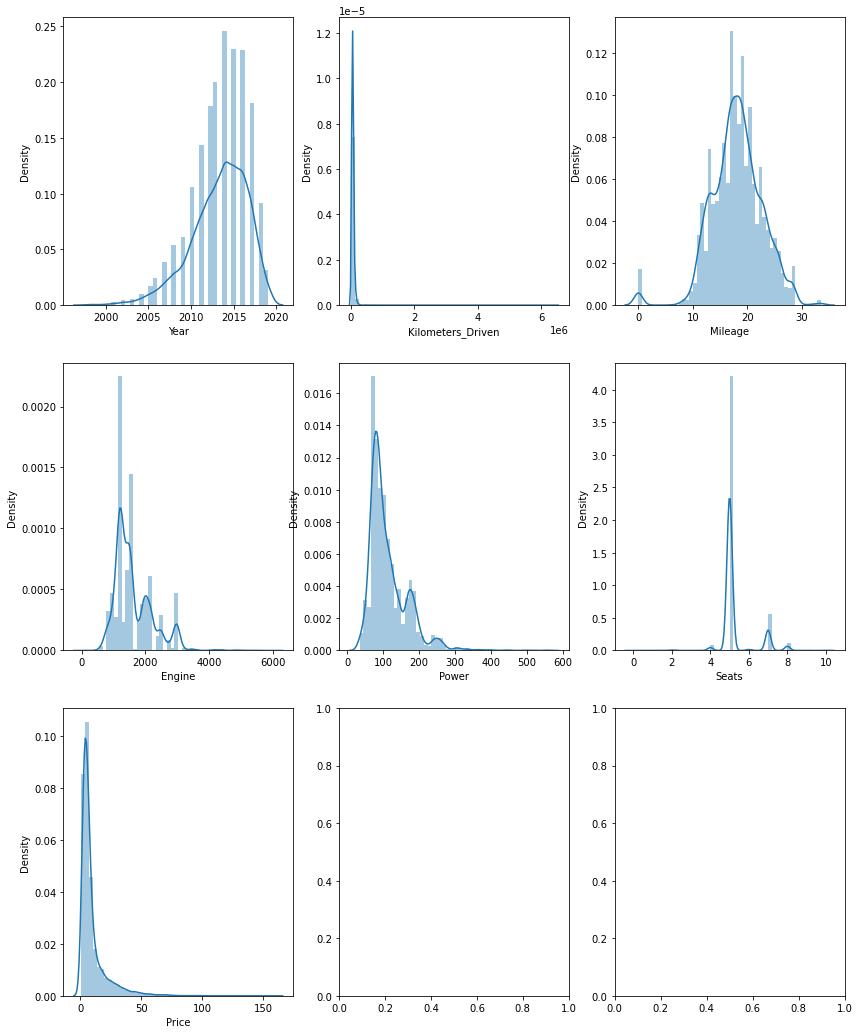

In [15]:
fig, ax=plt.subplots(figsize=(14,18),nrows=3,ncols=3)
                
ax = ax.flatten()

for i,col in enumerate(['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']):
    sns.distplot(data[col],ax=ax[i])
plt.show()

In [14]:
# 숫자 피처의 왜곡도 수정 - 로그변환
from scipy.stats import skew
features_index=data.dtypes[data.dtypes!='object'].index
skew_features=data[features_index].apply(lambda x:skew(x))

## skew 정도가 1 이상인 컬럼들만 추출
skew_features_top=skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

Kilometers_Driven    58.710026
Price                 3.334401
Power                 1.919575
Seats                 1.853764
Engine                1.425361
dtype: float64


- 타겟값이 위 분포처럼 왜곡된 형태를 이룰 경우, 회귀 예측 성능이 저하되는 경우가 발생하기 매우 쉽다. 따라서, 로그변환을 통한 타겟값을 우선적으로 정규화하고 왜곡도가 1이상인 다른 열에 대해서도 로그변환 진행. 


- Seats열의 경우, 카테고리 피처이기 때문에 로그변환 없이 넘어가기


- Kilometers_Driven열이나 Engine 열처럼 수치형 변수 중 값이 큰 열은 선형회귀에서 회귀계수를 연산할 때, 크게 영향을 주기 때문에 로그변환을 통해 크기를 줄여주는 과정도 더불어 가져가는 것이 좋다

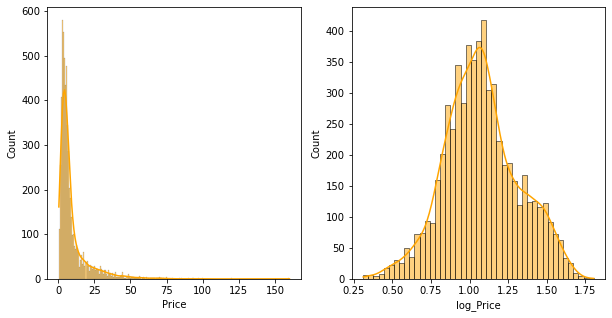

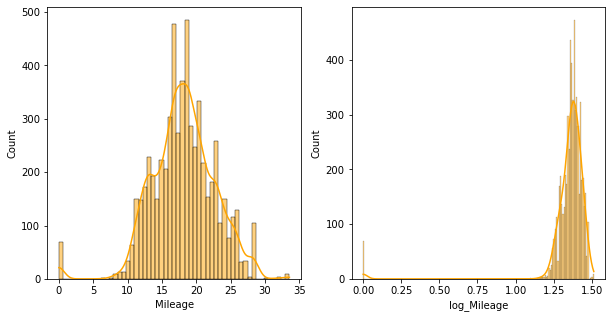

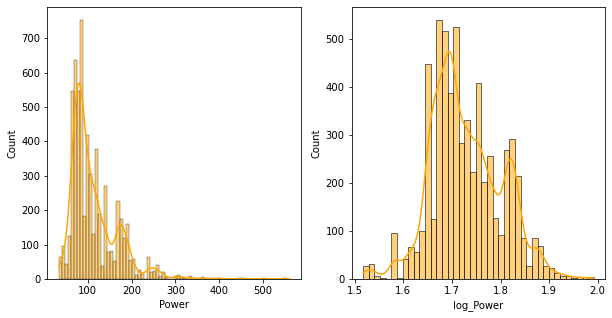

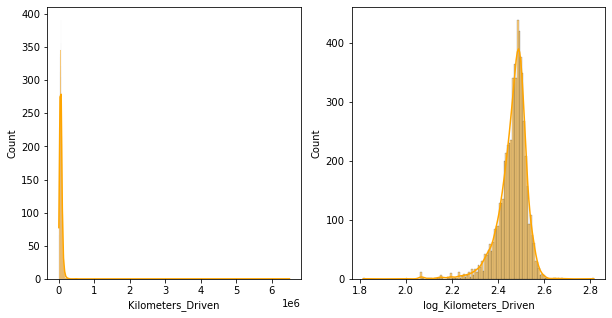

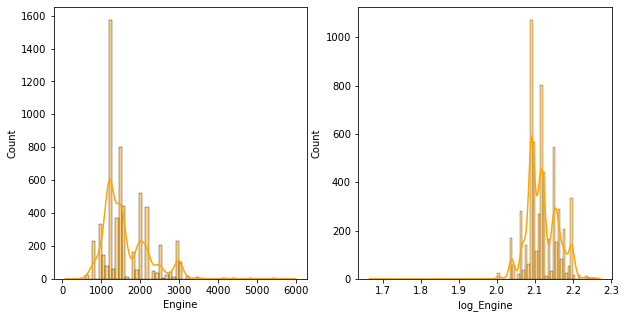

In [15]:
data_log=data.copy()
col_list=['Price','Mileage','Power','Kilometers_Driven','Engine']
for col in col_list:
    data_log['log_'+col]=np.log1p(data_log[col]) # 0을 가진 변수도 로그변환이 가능하도록 log1p()사용

    f,axes=plt.subplots(ncols=2,figsize=(10,5))
    sns.histplot(data[col],ax=axes[0],color='orange',kde=True,)
    sns.histplot(np.log1p(data_log['log_'+col]), ax=axes[1],color='orange',kde=True)
    plt.show()

마일리지 변수 이외에는 로그변환을 해주는 것이 좋아보인다.

이후에 성능 비교를 위해 data_log와 data 데이터프레임 변수는 둘다 가져가도록 한다.

In [16]:
data_log.drop(['Price','Power','Engine','Kilometers_Driven','log_Mileage'],axis=1,inplace=True)
data_log

,Brand,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,log_Price,log_Power,log_Kilometers_Driven,log_Engine
0,Maruti,Mumbai,2010,CNG,Manual,First,26.20,5.0,1.011601,4.080922,11.184435,6.906755
1,Hyundai,Pune,2015,Diesel,Manual,First,19.67,5.0,2.602690,4.845761,10.621352,7.367077
2,Honda,Chennai,2011,Petrol,Manual,First,18.20,5.0,1.704748,4.496471,10.736418,7.090077
3,Maruti,Chennai,2012,Diesel,Manual,First,20.77,7.0,1.945910,4.497139,11.373675,7.130099
4,Audi,Coimbatore,2013,Diesel,Automatic,Second,15.20,5.0,2.930660,4.954418,10.613271,7.585281
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,Diesel,Manual,First,28.40,5.0,1.749200,4.317488,10.217057,7.130099
6015,Hyundai,Jaipur,2015,Diesel,Manual,First,24.40,5.0,1.609438,4.276666,11.512935,7.021976
6016,Mahindra,Jaipur,2012,Diesel,Manual,Second,14.00,8.0,1.360977,4.727388,10.915107,7.823646
6017,Maruti,Kolkata,2013,Petrol,Manual,First,18.90,5.0,1.294727,4.220977,10.736418,6.906755


다음으로 Year변수는 연도를 뜻하는 카테고리형 피처이지만 숫자형 값으로 되어있으며 그 값이 다른 피처에 비해 현재 매우 큰 상태이다. 캐글링크에 들어가보면 데이터셋이 업데이트된지 2년이 된 상태이므로 데이터가 수집되었던 2019년도를 기준으로 출시된 연도로 부터 얼마나 햇수가 지났는지에 대한 파생변수로 변환하도록 하자.

In [19]:
# Year변수의 최댓값이 2019이므로 데이터 수집 연도(2019) - Year변수에 1을 더해주도록 하자
data_log.Year.max()

2019

In [17]:
data_log.Year=2019-data_log.Year+1
data_log

,Brand,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,log_Price,log_Power,log_Kilometers_Driven,log_Engine
0,Maruti,Mumbai,10,CNG,Manual,First,26.20,5.0,1.011601,4.080922,11.184435,6.906755
1,Hyundai,Pune,5,Diesel,Manual,First,19.67,5.0,2.602690,4.845761,10.621352,7.367077
2,Honda,Chennai,9,Petrol,Manual,First,18.20,5.0,1.704748,4.496471,10.736418,7.090077
3,Maruti,Chennai,8,Diesel,Manual,First,20.77,7.0,1.945910,4.497139,11.373675,7.130099
4,Audi,Coimbatore,7,Diesel,Automatic,Second,15.20,5.0,2.930660,4.954418,10.613271,7.585281
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,6,Diesel,Manual,First,28.40,5.0,1.749200,4.317488,10.217057,7.130099
6015,Hyundai,Jaipur,5,Diesel,Manual,First,24.40,5.0,1.609438,4.276666,11.512935,7.021976
6016,Mahindra,Jaipur,8,Diesel,Manual,Second,14.00,8.0,1.360977,4.727388,10.915107,7.823646
6017,Maruti,Kolkata,7,Petrol,Manual,First,18.90,5.0,1.294727,4.220977,10.736418,6.906755


In [18]:
# Year변수 최솟값이 1로 변한 것 확인
data_log.Year.min()

1

### 상관관계 시각화

<AxesSubplot:>

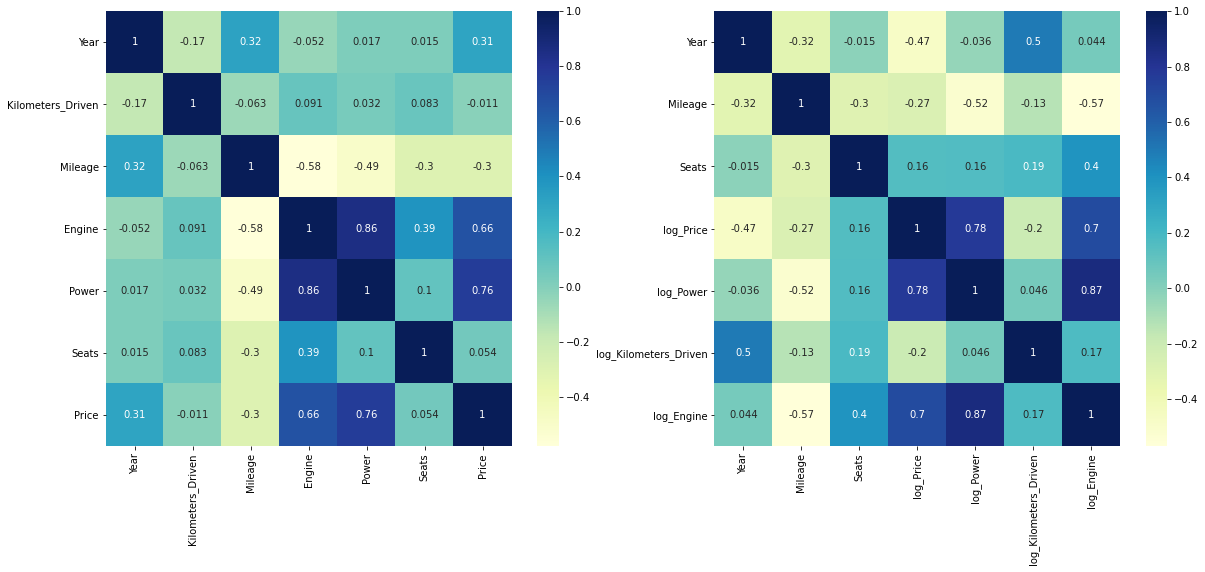

In [22]:
import seaborn as sns
f,axes=plt.subplots(ncols=2,figsize=(20,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,ax=axes[0])
sns.heatmap(data_log.corr(),cmap='YlGnBu',annot=True,ax=axes[1])

로그변환 이전과 이후를 비교하면 로그변환 후 타겟값에 대한 상관관계가 뚜렷해졌음을 알 수 있다. Price와 양의 상관관계가 높은 열은 Power과 Engine으로 볼 수 있고, Year변수를 오래된 정도로 값을 바꿔주니 음의 상관관계가 -0.47로 강해졌음을 확인할 수 있다.

### 원핫인코딩

In [23]:
for col in ['Brand','Location','Fuel_Type','Owner_Type','Transmission']:
    print(data_log[col].value_counts(),'\n')

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Smart               1
Isuzu               1
Lamborghini         1
Bentley             1
Name: Brand, dtype: int64 

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64 

Diesel      3205
Petrol      2746
CNG           56
LPG       

In [24]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  6019 non-null   object 
 1   Location               6019 non-null   object 
 2   Year                   6019 non-null   int64  
 3   Fuel_Type              6019 non-null   object 
 4   Transmission           6019 non-null   object 
 5   Owner_Type             6019 non-null   object 
 6   Mileage                6019 non-null   float64
 7   Seats                  6019 non-null   float64
 8   log_Price              6019 non-null   float64
 9   log_Power              6019 non-null   float64
 10  log_Kilometers_Driven  6019 non-null   float64
 11  log_Engine             6019 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 564.4+ KB


In [19]:
# object형 피처에 대해 원-핫 인코딩
print('get_dummies() 수행 전 데이터 shape:',data_log.shape)
data_ohe=pd.get_dummies(data_log)
print('get_dummies() 수행 후 데이터 shape:',data_ohe.shape,'\n')

get_dummies() 수행 전 데이터 shape: (6019, 12)
get_dummies() 수행 후 데이터 shape: (6019, 60) 



In [24]:
data_ohe.log_Price.max()

5.081404364984463

원핫인코딩 이후 컬럼이 5배가 늘었기 때문에 차원의 저주 문제가 우려된다. 브랜드 컬럼만 빼도 컬럼의 절반이 줄어들기 때문에 이 부분에 대해서는 성능을 비교하며 브랜드 컬럼을 그대로 둘지 말지 결정하면 될 것으로 보인다.

## 회귀분석

평균 잔차 제곱합에 루트를 취한 것을 평가지표로 하지만 타겟값을 로그변환했으므로 실제 출력되는 평가 지표의 값은 로그변환된 RMSE(=RMSLE)이다.

In [21]:
# RMSE 평가 함수 생성
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse,3)))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target=data_ohe['log_Price']
X_features=data_ohe.drop('log_Price',axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
lasso=Lasso(alpha=0.00001)
lasso.fit(X_train,y_train)

models=[lr,ridge,lasso]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.191
Ridge 로그 변환된 RMSE: 0.191
Lasso 로그 변환된 RMSE: 0.192


[0.19128902766710687, 0.19133114917362876, 0.1923139984036854]

- Brand 컬럼을 지운 후 성능 비교

In [31]:
data_2=data_log.copy()
data_2.drop('Brand',axis=1,inplace=True)
data2_ohe=pd.get_dummies(data_2)
data2_ohe.shape

(6019, 29)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target=data2_ohe['log_Price']
X_features=data2_ohe.drop('log_Price',axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
ridge=Ridge()
ridge.fit(X_train,y_train)
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

models=[lr,ridge,lasso]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.257
Ridge 로그 변환된 RMSE: 0.257
Lasso 로그 변환된 RMSE: 0.258


[0.25739800699191856, 0.25740353738945737, 0.2580541943135211]

오히려 성능이 많이 떨어졌기 때문에 Brand 컬럼은 유지하는 것이 좋다

In [26]:
# 회귀계수값 시각화를 위해 상위 10개, 하위 10개 회귀계수값과 컬럼명을 가지는 함수 생성
def get_top_bottom_coef(model):
    coef=pd.Series(model.coef_,index=X_features.columns)
    coef_high=coef.sort_values(ascending=False).head(10)
    coef_low=coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

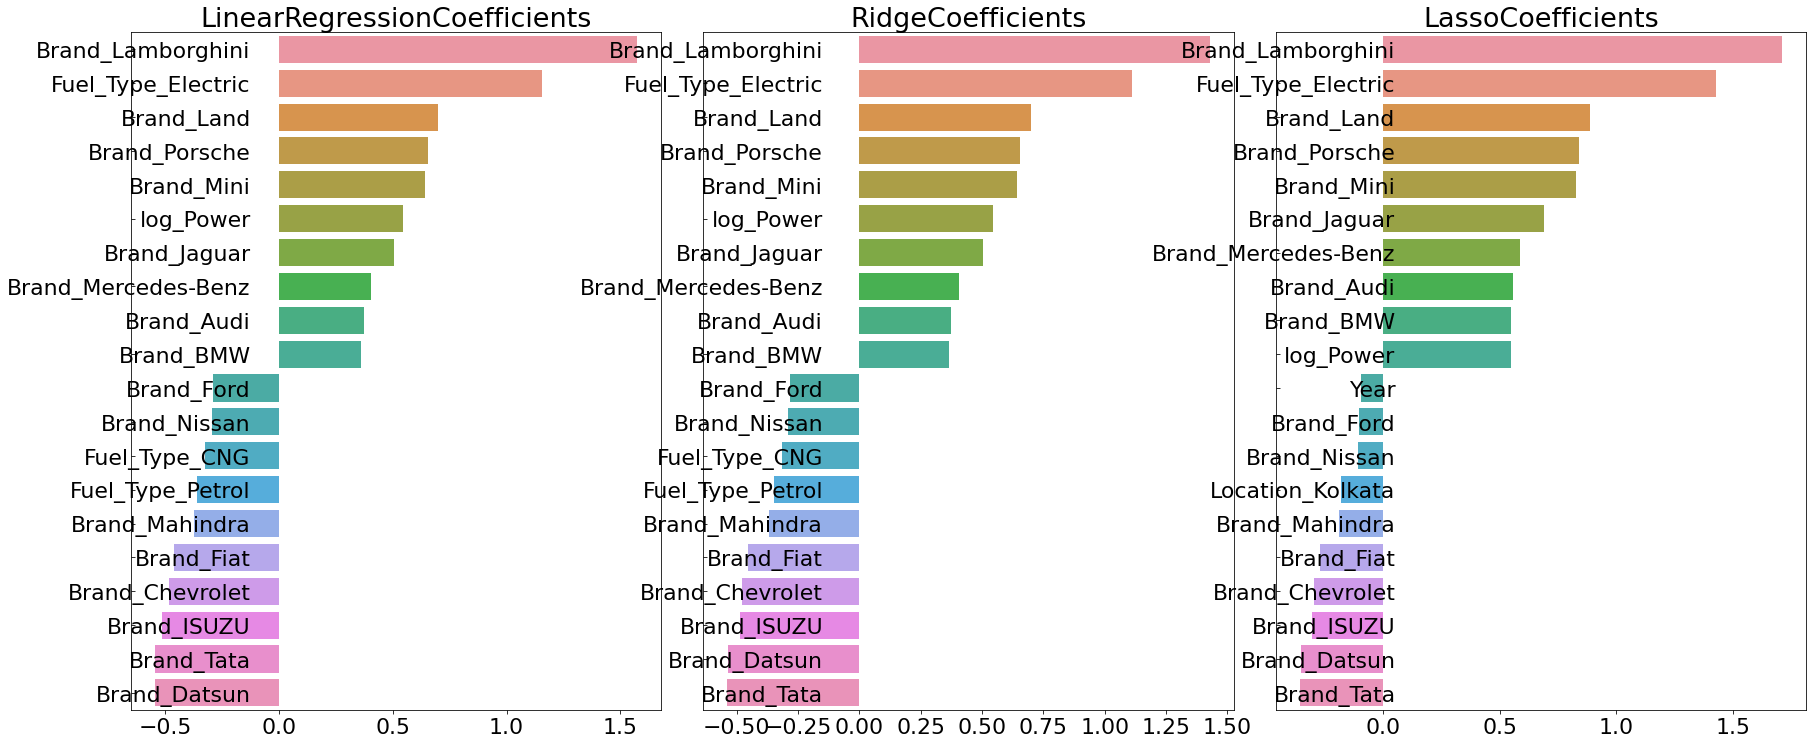

In [27]:
# 회귀계수값 시각화
import seaborn as sns

def visualize_coefficient(models):
    fig,axs=plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
  
    for i,model in enumerate(models):
        coef_high,coef_low=get_top_bottom_coef(model)
        coef_concat=pd.concat([coef_high,coef_low],axis=0)

        axs[i].set_title(model.__class__.__name__+'Coefficients',size=27)
        axs[i].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i].get_xticklabels()+axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i])

models=[lr,ridge,lasso]
visualize_coefficient(models)

릿지와 라쏘 규제 정도를 조정해주며 성능을 확인했을 때, RMSLE 평가 지표가 0.194정도 되었을 때, 시각화된 회귀계수의 순위가 비슷한 것을 확인할 수 있다.

### 이상치 제거

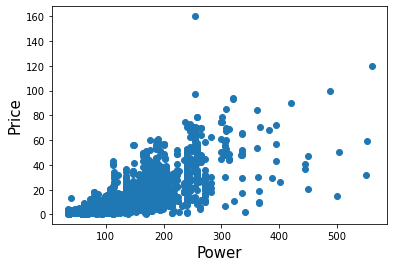

In [28]:
plt.scatter(x=data['Power'],y=data['Price'])
plt.ylabel('Price',fontsize=15)
plt.xlabel('Power',fontsize=15)
plt.show()

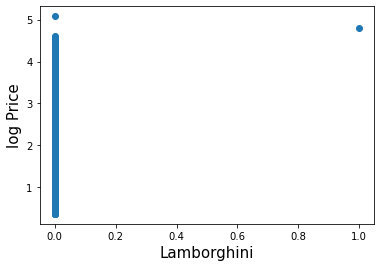

In [29]:
plt.scatter(x=data_ohe['Brand_Lamborghini'],y=data_ohe['log_Price'])
plt.ylabel('log Price',fontsize=15)
plt.xlabel('Lamborghini',fontsize=15)
plt.show()

In [30]:
cond1=data_ohe['log_Power']<np.log1p(350)
cond2=data_ohe['log_Price']>np.log1p(140)
cond3=data_ohe['Brand_Lamborghini']==1
outlier_index=data_ohe[cond1&cond2|cond3].index

print('아웃라이어 레코드 index:',outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:',data_ohe.shape)

data_ohe.drop(outlier_index,axis=0,inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:',data_ohe.shape)

아웃라이어 레코드 index: [4079 5781]
아웃라이어 삭제 전 house_df_ohe shape: (6019, 60)
아웃라이어 삭제 후 house_df_ohe shape: (6017, 60)


In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target=data_ohe['log_Price']
X_features=data_ohe.drop('log_Price',axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
lasso=Lasso(alpha=0.00001)
lasso.fit(X_train,y_train)

models=[lr,ridge,lasso]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.189
Ridge 로그 변환된 RMSE: 0.188
Lasso 로그 변환된 RMSE: 0.189


[0.18928421336613846, 0.18835713755075903, 0.18892942465516213]

람보르기니 중고차 한대와 랜드 자동차 중 이상치에 해당하는 두개의 행 데이터를 지웠더니 성능이 보다 나아졌다. 

그러나 이런식으로 이상치를 제거하다보면 전기차 또한 2대밖에 없어 그 둘을 제거하면 성능이 올라갈 텐데 **만약 중고차로 전기차가 나왔을 때, 제대로 예측이 안될 수 있다.** 최근에 들어 점점 전기차의 판매량과 사용이 늘어나는 추세인데 이 부분에 대해 좀 더 생각해볼 여지가 있다. 현재 데이터에서는 전기차나 특정 유명 브랜드의 자동차를 제거하면 성능은 높아지겠지만 **그 모델이 앞으로도 실용성이 있냐**는 질문에 대해서는 의문이 든다.

우선 이상치 제거는 중고매물로 나올 확률이 매우 적은 람보르기니와 Power는 낮지만 가격이 매우 높은 랜드 자동차 한대만 제거하는 것으로 한다.

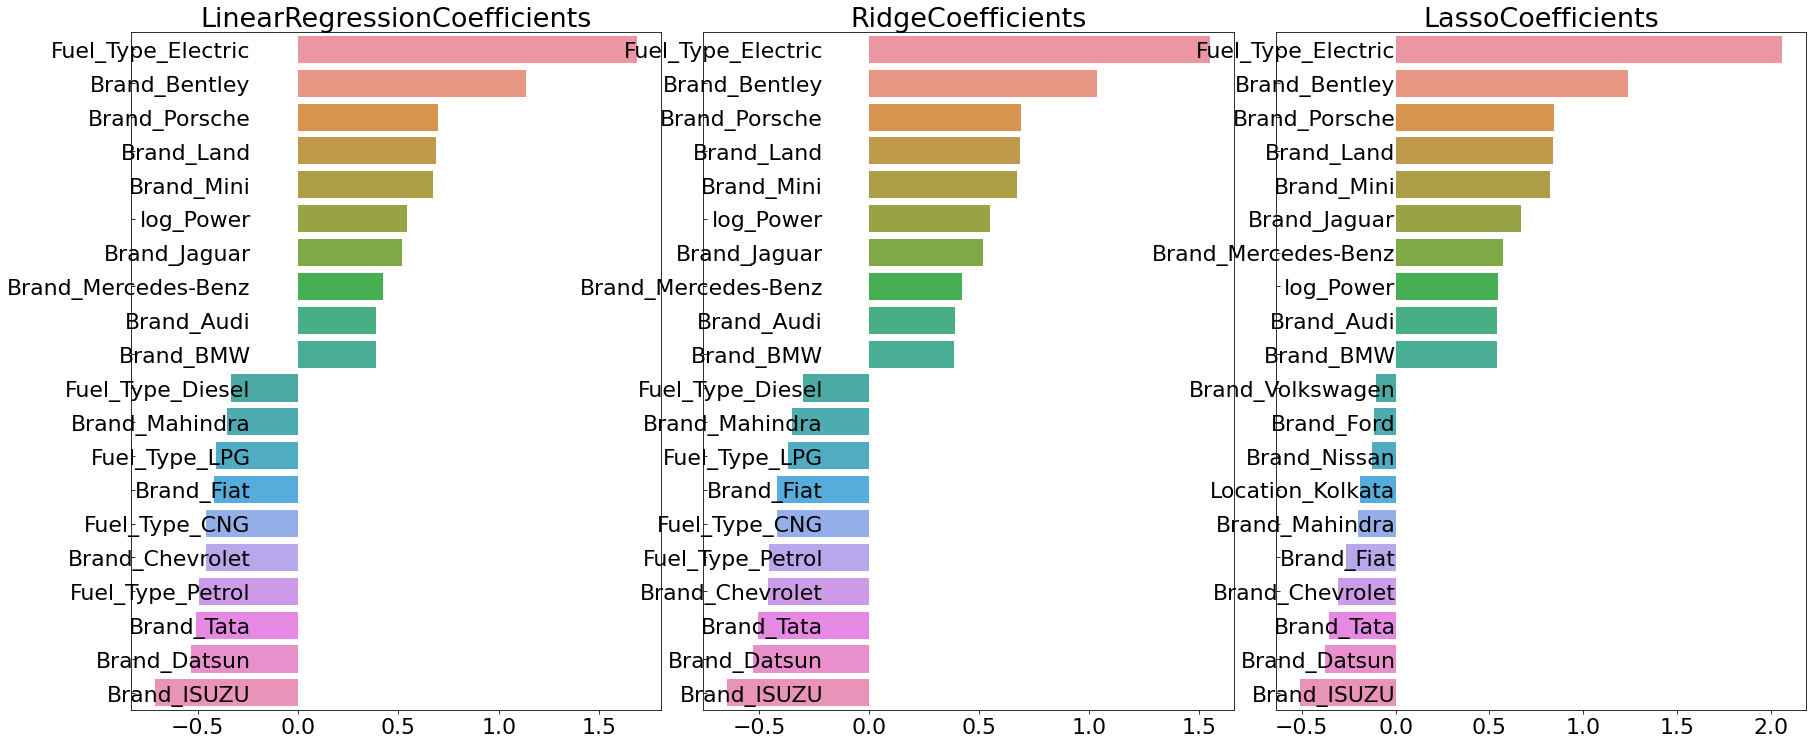

In [32]:
models=[lr,ridge,lasso]
visualize_coefficient(models)

## 회귀진단

In [36]:
import statsmodels.api as sm
X_features=sm.add_constant(X_features) #beta_0 값이 될 변수 만들기
model=sm.OLS(y_target,X_features,axis=1)
model_trained=model.fit()

In [37]:
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1508.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:32:27   Log-Likelihood:                 1246.6
No. Observations:                6017   AIC:                            -2385.
Df Residuals:                    5963   BIC:                            -2023.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.6732      0.068     -9.903      0.000      -0.806      -0.540
Year                         -0.0932      0.001    -80.830      0.000      -0.095      -0.091
Mileage                      -0.0064      0.001     -6.642      0.000      -0.008      -0.005
Seats                         0.0379      0.005      7.804      0.000       0.028       0.047
log_Power                     0.5393      0.018     30.790      0.000       0.505       0.574
log_Kilometers_Driven        -0.0698      0.005    -14.729      0.000      -0.079      -0.060
log_Engine                    0.3534      0.024     14.774      0.000       0.307       0.400
Brand_Ambassador              0.2173      0.193      1.124      0.261      -0.162       0.596
Brand_Audi                    0.3604      0.020     17.625      0.000       0.320       0.400
Brand_BMW                     0.3530      0.020     17.235      0.000       0.313       0.393
Brand_Bentley                 1.1220      0.193      5.807      0.000       0.743       1.501
Brand_Chevrolet              -0.4788      0.024    -20.358      0.000      -0.525      -0.433
Brand_Datsun                 -0.5480      0.056     -9.775      0.000      -0.658      -0.438
Brand_Fiat                   -0.4639      0.039    -11.783      0.000      -0.541      -0.387
Brand_Force                  -0.2120      0.112     -1.895      0.058      -0.431       0.007
Brand_Ford                   -0.2958      0.019    -15.470      0.000      -0.333      -0.258
Brand_Honda                  -0.2717      0.018    -15.243      0.000      -0.307      -0.237
Brand_Hyundai                -0.2641      0.017    -15.737      0.000      -0.297      -0.231
Brand_ISUZU                  -0.5331      0.136     -3.909      0.000      -0.801      -0.266
Brand_Isuzu                  -0.2377      0.192     -1.237      0.216      -0.614       0.139
Brand_Jaguar                  0.4968      0.035     14.308      0.000       0.429       0.565
Brand_Jeep                   -0.0208      0.052     -0.400      0.689      -0.123       0.081
Brand_Lamborghini         -1.743e-15   5.65e-16     -3.084      0.002   -2.85e-15   -6.35e-16
Brand_Land                    0.6588      0.030     22.109      0.000       0.600       0.717
Brand_Mahindra               -0.3923      0.021    -18.534      0.000      -0.434      -0.351
Brand_Maruti                 -0.2039      0.017    -11.738      0.000      -0.238      -0.170
Brand_Mercedes-Benz           0.3803      0.019     19.650      0.000       0.342       0.418
Brand_Mini                    0.6754      0.041     16.513      0.000       0.595       0.756
Brand_Mitsubishi             -0.0622      0.040     -1.537      0.124      -0.142       0.017
Brand_Nissan                 -0.2955      0.026    -11.560      0.000      

Durbin-Watson 통계량이 2에 가깝기 때문에 오차의 독립성을 만족한다고 볼 수 있으며, p-value를 보면 Brand_Ambassador, Brand_Force, Brand_Isuzu, Brand_Jeep, Brand_Mitsubishi, Brand_Smart	열이 p값이 0.05 이상이므로 이 열들은 삭제하여 전과 후를 비교하도록 한다.

In [39]:
data_p=data_ohe.drop(['Brand_Ambassador', 'Brand_Force', 'Brand_Isuzu', 'Brand_Jeep', 'Brand_Mitsubishi', 'Brand_Smart'],axis=1)

y_target=data_p['log_Price']
X_features=data_p.drop('log_Price',axis=1,inplace=False)

X_features=sm.add_constant(X_features) #beta_0 값이 될 변수 만들기
model=sm.OLS(y_target,X_features,axis=1)
model_trained=model.fit()

model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1664.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:41:47   Log-Likelihood:                 1244.0
No. Observations:                6017   AIC:                            -2390.
Df Residuals:                    5968   BIC:                            -2062.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.6973      0.070     -9.984      0.000      -0.834      -0.560
Year                         -0.0932      0.001    -80.890      0.000      -0.095      -0.091
Mileage                      -0.0065      0.001     -6.740      0.000      -0.008      -0.005
Seats                         0.0373      0.005      7.718      0.000       0.028       0.047
log_Power                     0.5386      0.017     31.110      0.000       0.505       0.573
log_Kilometers_Driven        -0.0699      0.005    -14.774      0.000      -0.079      -0.061
log_Engine                    0.3536      0.024     14.979      0.000       0.307       0.400
Brand_Audi                    0.4182      0.032     12.932      0.000       0.355       0.482
Brand_BMW                     0.4108      0.032     12.675      0.000       0.347       0.474
Brand_Bentley                 1.1797      0.201      5.868      0.000       0.786       1.574
Brand_Chevrolet              -0.4213      0.034    -12.217      0.000      -0.489      -0.354
Brand_Datsun                 -0.4903      0.063     -7.786      0.000      -0.614      -0.367
Brand_Fiat                   -0.4065      0.048     -8.549      0.000      -0.500      -0.313
Brand_Ford                   -0.2384      0.031     -7.644      0.000      -0.300      -0.177
Brand_Honda                  -0.2140      0.031     -7.013      0.000      -0.274      -0.154
Brand_Hyundai                -0.2067      0.030     -6.868      0.000      -0.266      -0.148
Brand_ISUZU                  -0.4763      0.143     -3.332      0.001      -0.756      -0.196
Brand_Jaguar                  0.5544      0.043     12.790      0.000       0.469       0.639
Brand_Lamborghini          2.451e-15   4.88e-16      5.026      0.000     1.5e-15    3.41e-15
Brand_Land                    0.7165      0.039     18.283      0.000       0.640       0.793
Brand_Mahindra               -0.3339      0.032    -10.521      0.000      -0.396      -0.272
Brand_Maruti                 -0.1464      0.031     -4.795      0.000      -0.206      -0.087
Brand_Mercedes-Benz           0.4380      0.031     13.913      0.000       0.376       0.500
Brand_Mini                    0.7327      0.049     14.925      0.000       0.636       0.829
Brand_Nissan                 -0.2381      0.036     -6.635      0.000      -0.308      -0.168
Brand_Porsche                 0.7406      0.056     13.197      0.000       0.631       0.851
Brand_Renault                -0.2183      0.034     -6.462      0.000      -0.284      -0.152
Brand_Skoda                  -0.1669      0.033     -5.083      0.000      -0.231      -0.103
Brand_Tata                   -0.4909      0.033    -14.926      0.000      -0.555      -0.426
Brand_Toyota                 -0.0122      0.031     -0.397      0.691      

p값이 대체적으로 0에 매우 가까우며 더빈왓슨 통계량도 조금 늘어난 것을 확인할 수 있다!

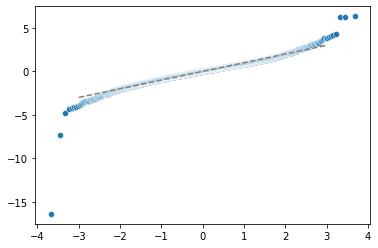

In [41]:
import scipy.stats
pred = model_trained.predict()
residual = data_ohe['log_Price'] - model_trained.predict() 
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

<AxesSubplot:ylabel='Count'>

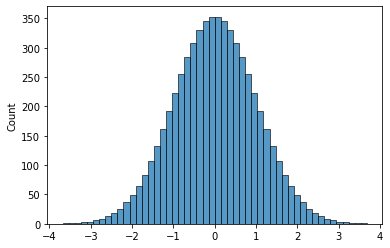

In [51]:
# 잔차의 히스토그램
sns.histplot(data=pred,x=x)

<AxesSubplot:>

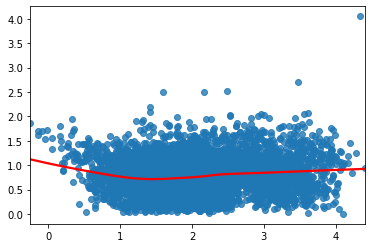

In [49]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

위 시각화로 보았을 때, 잔차가 직선의 형태를 잘 따라가고 있으며 히스토그램이 정규분포에 가까운 것으로 보아 정규성을 만족한다고 볼 수 있다. 또한, 세번째 시각화에서 잔차가 고르게 분포한 것을 보아 등분산성도 만족한다고 볼 수 있다

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]
vif["features"] = X_features.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
30,inf,Brand_Renault
31,inf,Brand_Skoda
33,inf,Brand_Tata
34,inf,Brand_Toyota
35,inf,Brand_Volkswagen
36,inf,Brand_Volvo
37,inf,Location_Ahmedabad
38,inf,Location_Bangalore
39,inf,Location_Chennai
40,inf,Location_Coimbatore


- 원핫인코딩된 변수들을 제외하고 보면 log_Engine 열의 다중공선성이 의심된다. 이 열을 삭제하고 변화된 VIF수치를 확인해보도록 한다.

In [34]:
X=X_features.drop('log_Engine',axis=1)

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
29,inf,Brand_Renault
30,inf,Brand_Skoda
32,inf,Brand_Tata
33,inf,Brand_Toyota
34,inf,Brand_Volkswagen
35,inf,Brand_Volvo
36,inf,Location_Ahmedabad
37,inf,Location_Bangalore
38,inf,Location_Chennai
39,inf,Location_Coimbatore


VIF수치가 많이 낮아졌음을 확인할 수 있다.